In [269]:
import numpy as np
import copy
import skimage.measure
import cv2
from PIL import Image as image

In [270]:
img = image.open('Pittsburgh.JPG')
roads = copy.deepcopy(np.asarray(img))
img = cv2.imread('PittsburghCrimes.JPG')
res = cv2.resize(img, dsize=(img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)#cv2.resize(img, dsize=(roads.shape[1], roads.shape[0]), interpolation=cv2.INTER_CUBIC)
crimes = copy.deepcopy(res)

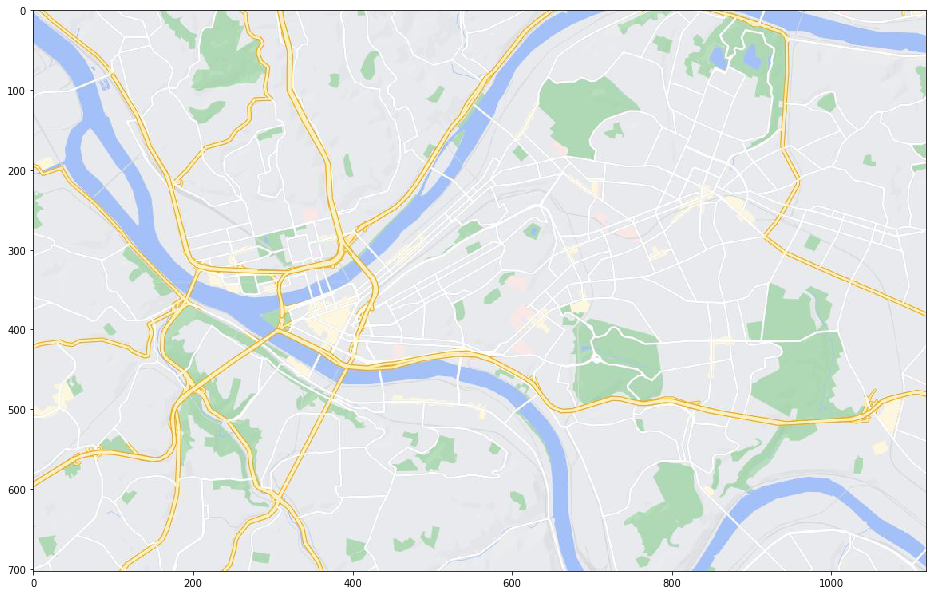

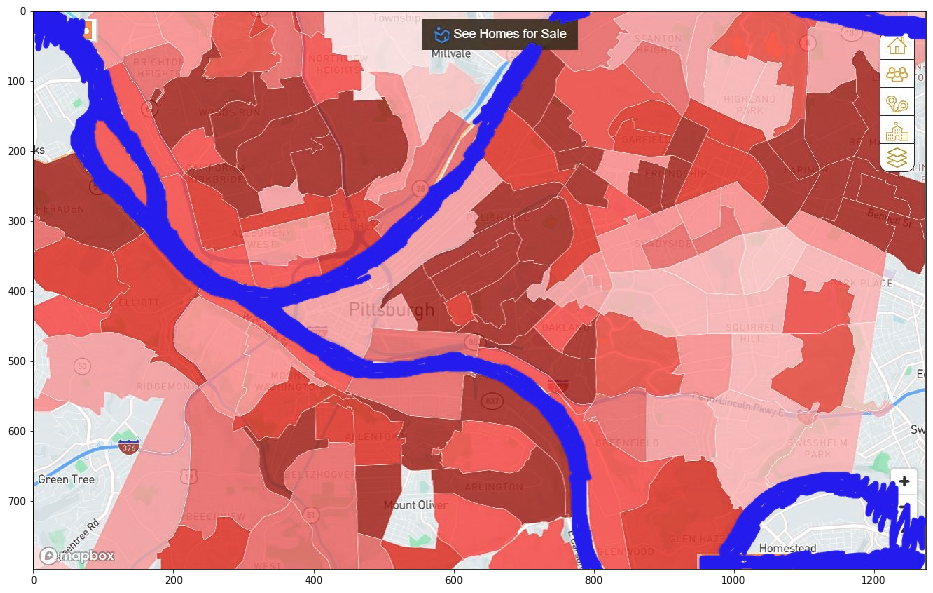

In [271]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 12))
plt.imshow(roads, interpolation='nearest')
plt.show()
plt.figure(figsize=(16, 12))
plt.imshow(crimes, interpolation='nearest')
plt.show()
roads = roads.astype('int32')
crimes = crimes.astype('int32')

In [277]:
import tensorflow as tf
import pandas as pd

def generate_model():

    #Given tthat all of the maps come from the same source,
    #We do not mind overfitting to road data.
    #So there is no harm in using a large network.
    return tf.keras.Sequential([
        tf.keras.Input(shape = (3,)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

model = generate_model()

model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = tf.keras.losses.BinaryCrossentropy,
              metrics = 'accuracy')

In [ ]:
train_filepath = './roads.txt'
train_df = pd.read_csv(train_df)

input_cols = list(train_df.columns)[0:-1]
#RGB features
#Last is target
target_cols ='target'
inputs_df = train_df[input_cols].copy()
targets = train_df[target_cols]


model.fit(inputs_df, targets, epochs = 500)

In [274]:
roads[background_mask] = [0, 0, 0]
roads[other_mask] = [255, 255, 255]

In [275]:
weight = np.ones(shape=(crimes.shape[0], crimes.shape[1]))
weight[crimes_mask] = crimes[crimes_mask, 0] - (crimes[crimes_mask, 2] + crimes[crimes_mask, 1])/2
crimes[crimes_mask, 0] = (crimes[crimes_mask, 0] - (crimes[crimes_mask, 2] + crimes[crimes_mask, 1])/2)*255/crimes[crimes_mask, 0];
crimes[crimes_mask, 2] = 0
crimes[crimes_mask, 1] = 0
crimes[not_other_mask] = [255, 255, 255]

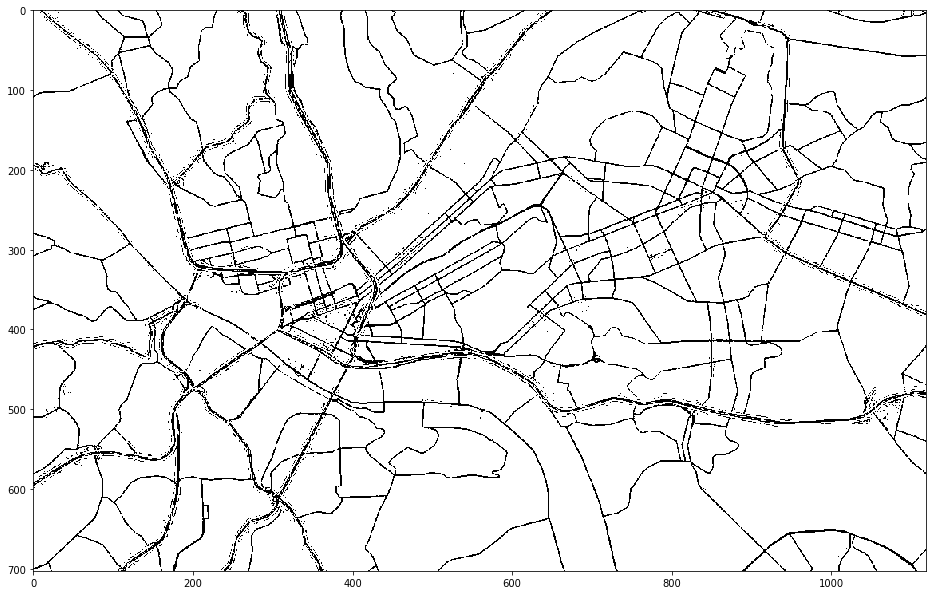

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [276]:
plt.figure(figsize=(16, 12))
plt.imshow(roads, interpolation='nearest')
plt.show()
roads = roads.astype('uint8')
im = image.fromarray(roads)
im.save("roadsP.jpg")
from google.colab import files
files.download('roadsP.jpg') 

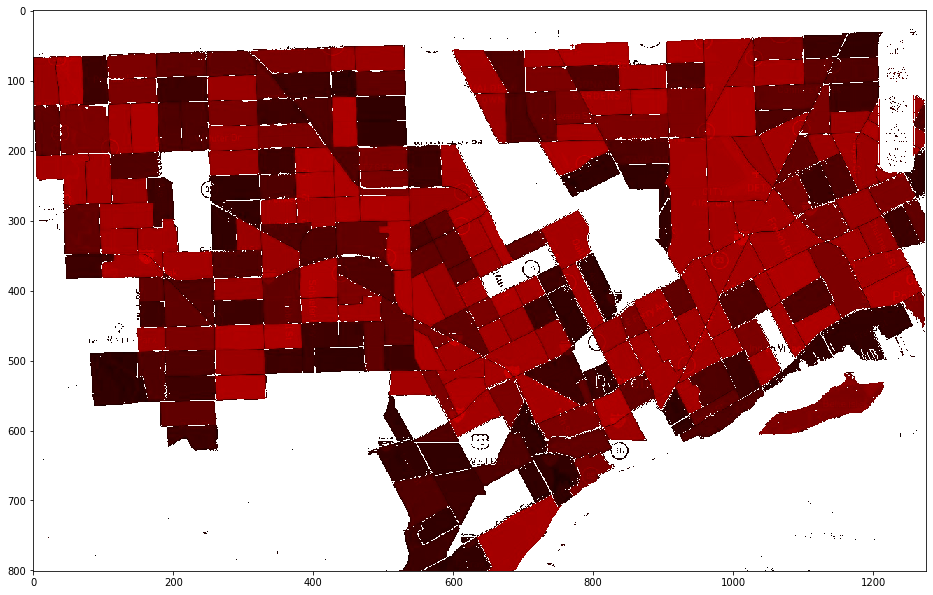

In [188]:
plt.figure(figsize=(16, 12))
plt.imshow(crimes, interpolation='nearest')
plt.show()

In [189]:
skimage.measure.block_reduce(weight, (10,10), np.max)

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ..., 10.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [190]:
sum(sum(weight))
#0.00029333715 Detroit
#0.00019205514 Baltimore
#0.00010663968 Pittsburgh
#Assault 4000
#Homocide 250
#Theft 2300
#Shooting 500
#Property 13000

57561379.0

In [191]:
arr = np.zeros(shape=(roads.shape[0], roads.shape[1]))

In [192]:
arr[background_mask] = 1

In [193]:
print(weight.shape)
print(arr.shape)

(801, 1276)
(1084, 646)


In [194]:
weight = np.tile(weight, (9, 9))

In [209]:
import random
x = random.randint(0, 6000)
y = random.randint(0, 9000)
snap = weight[x:x+arr.shape[0],y:y+arr.shape[0]]

In [210]:
arr = arr.astype(int)
weight = weight.astype(int)
snap = snap.astype(int)

In [211]:
#np.savetxt("arrayNear.in", arr, fmt='%d', delimiter=' ', newline='\n', header = f"{arr.shape[0]} {arr.shape[1]}\n")
#np.savetxt("random.in", weight, fmt='%d', delimiter=' ', newline='\n', header = f"{arr.shape[0]} {arr.shape[1]}\n")
np.savetxt("random3.in", snap, fmt='%d', delimiter=' ', newline='\n', header = f"{arr.shape[0]} {arr.shape[1]}\n")

In [212]:
from google.colab import files
files.download('random3.in') 
#files.download('weightP.in') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
#This converts the file into a much more readable format for the neural network to work on
df = pd.DataFrame(roads)
df['target'] = np.squeeze(arr)

df.to_csv('roads.txt')
#Stores as a CSV file -- Cols -- R, G, B, label 

In [127]:
arr = arr.reshape(arr.shape[0]*arr.shape[1])

In [129]:
from google.colab import files
files.download('roads.txt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>